# Lesson 5 - Starter Code

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset

mammals = pd.read_csv('/Users/jamiew/GA-DataScience/DS-SF-32/dataset/msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [42]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


In [43]:
%matplotlib inline
import seaborn as sns

mammals[mammals.bodywt>1000]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.1,4.603,2547.0
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.7,5.712,6654.0


### Lets check out a scatter plot of body weight and brain weight

In [44]:
mammals[['bodywt', 'brainwt']].corr(method='spearman') #not driven by outliers
#correlation matrix - what is the point of doing this now? <-- In relation to a class question

,bodywt,brainwt
bodywt,1.000000,0.957158
brainwt,0.957158,1.000000


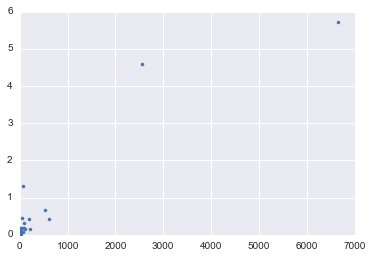

In [45]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')##what's the dot for? <-- Question
# show the plot
plt.show()

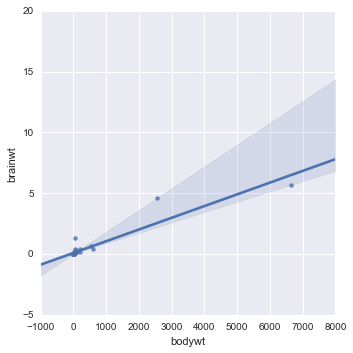

In [46]:
sns.lmplot('bodywt', 'brainwt', mammals)

In [47]:
log_columns = ['bodywt', 'brainwt']
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log)

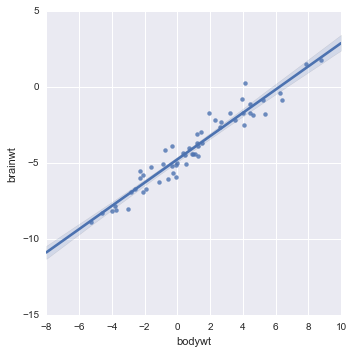

In [48]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [49]:
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)



##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


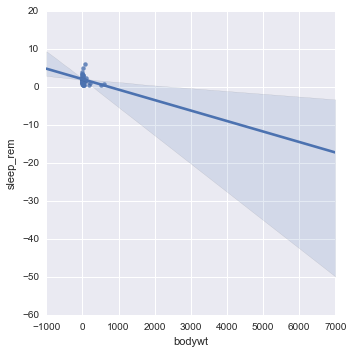

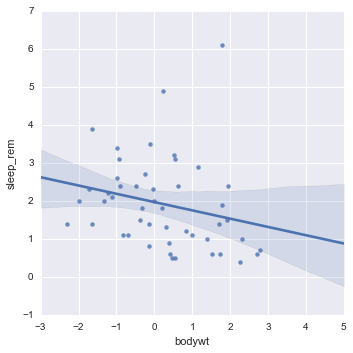

In [50]:
x = 'bodywt'
y = 'sleep_rem'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals) 

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [51]:
# this is the standard import if you're using "formula notation" (similar to R)
# documentation at http://statsmodels.sourceforge.net/devel/regression.html

import statsmodels.formula.api as smf

x = ['bodywt']
y = ['sleep_rem']

#results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
#print results.summary()

lm = smf.ols(formula='brainwt ~ bodywt', data=mammals).fit()
print lm.summary()
#results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()


# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

#print the full summary


                            OLS Regression Results                            
Dep. Variable:                brainwt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           9.16e-26
Time:                        19:25:45   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.0

#### Use Statsmodels to make the prediction

In [52]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'bodywt': [50]})
X_new.head()

,bodywt
0,50


In [53]:
lm.predict(X_new)

array([ 0.13411477])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

[-0.07088001 -0.08564563 -0.24128685 -0.0294126  -0.00198376 -0.00320961
 -0.08111907 -0.07992217 -0.08497515 -0.08028126]
P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


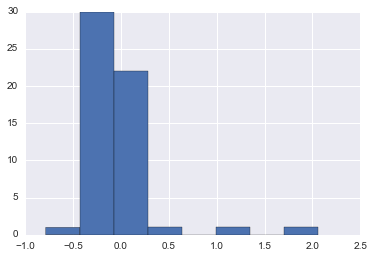

In [54]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values
    
    print residuals[0:10]

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    b = np.ceil(np.sqrt(len(y)))
    plt.hist(residuals, bins=int(b))
    # keep the model
    return algo

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

## Demo: EVALUATING A MODEL (20 mins)

### What does our output tell us?



* What is the relationship between brain weight and body weight? 

* Is this variable significantly contributing to the model? 

* What does the residual plot tell us?

* How much variance does the current model explain? 

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [55]:
# prediction at 0?
print lm.predict([[0]])

[ 0.08591731]


[ 0.0150282   0.00027132 -0.16674482  0.05623929  0.08365296  0.08207258
  0.00478444  0.00598718  0.00094103  0.00561709]
P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


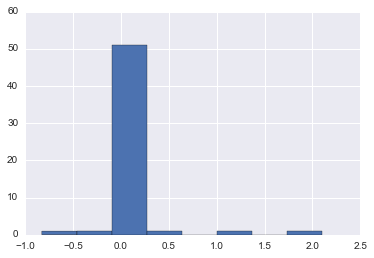

In [56]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0]])

## Intrepretation?


Answer:

## Guided Practice: Using the LinearRegression object (15 mins)

##### skipping this for now
We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.

In [57]:
#starter
X =
y =
loop = []
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

SyntaxError: invalid syntax (<ipython-input-57-04cc83d21c13>, line 2)

### Which model performed the best? The worst? Why?


Answer: 

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

In [ ]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [ ]:
wd = '/Users/jamiew/GA-DataScience/DS-SF-32/dataset/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

### What is Multicollinearity?


+ When two or more variables in a regression are highly correlated; it can cause problems with the model.

+ We want our multiple variables to be mostly independent to avoid multicollinearity.

+ With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

+ Our data are already normalized between 0 and 1, so we'll start off with the correlations and modeling.

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### What does the correlation matrix explain?

Answer: the correlation between multicolinear variables. This one shows that temp and atemp are correlated and casual is not correlated with temp or atemp. 

## <font color='red'>We can measure this effect in the coefficients:</font>



In [ ]:
#This section will help with the class pre-work below
# run 3 models
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: 

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


In [ ]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
weather.head()

In [ ]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


### Similar in Statsmodels

In [ ]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

In [ ]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer:

## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [ ]:
bike_data.dtypes

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features... 
- but could be strong indicators for predicting guest riders.

In [ ]:
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join() # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

In [ ]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [ ]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!

In [59]:
# read in the bike dataset

wd = '/Users/jamiew/GA-DataScience/DS-SF-32/dataset/'
bikeshare = pd.read_csv(wd+'bikeshare.csv')
bikeshare.head()

#mammals = pd.read_csv('/Users/jamiew/GA-DataScience/DS-SF-32/dataset/msleep.csv')
#mammals = mammals[mammals.brainwt.notnull()].copy()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


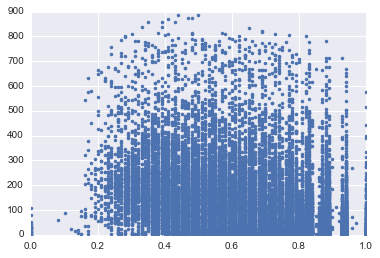

In [60]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(bike_data.hum, bike_data.registered, '.')##what's the dot for? <-- Question
# show the plot
plt.show()

temp
[ -73.04303055  -48.77087326  -53.77087326  -76.04303055  -85.04303055
  -85.04303055  -80.77087326  -73.49871597  -79.04303055 -101.1316597 ]
P Values: [ 0.]
Coefficients: [ 263.60786447]
y-intercept: 22.7771430753
R-Squared: 0.112466899071

atemp
[ -85.75798471  -62.3058831   -67.3058831   -88.75798471  -97.75798471
  -88.88307164  -94.3058831   -87.88307164  -91.75798471 -110.50781086]
P Values: [ 0.]
Coefficients: [ 292.9014216]
y-intercept: 14.4316654332
R-Squared: 0.110595245982

temp, atemp
[ -74.89357969  -50.73773638  -55.73773638  -77.89357969  -86.89357969
  -85.44283868  -82.73773638  -75.586681    -80.89357969 -102.50737709]
P Values: [ 0.  0.]
Coefficients: [ 221.4039422    47.87924122]
y-intercept: 20.9722000195
R-Squared: 0.11253931273



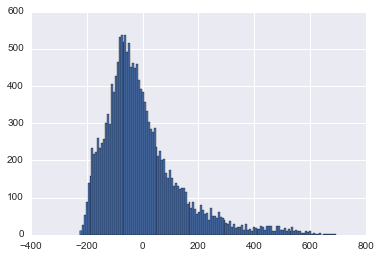

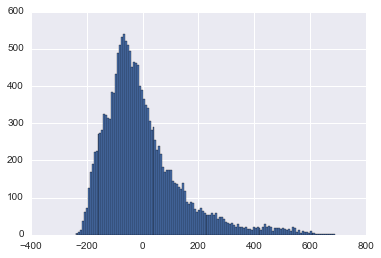

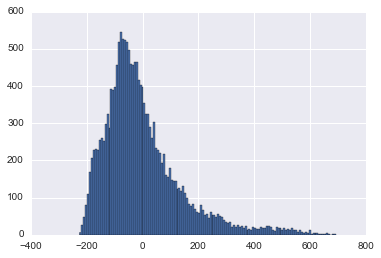

In [61]:
y = bike_data['registered']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print
    
#target variable?

[-40.50194744 -18.48118373 -23.48118373 -55.35103355 -64.35103355
 -64.35103355 -50.48118373 -31.63648622 -58.35103355 -77.35863147]
P Values: [  0.00000000e+000   1.01368000e-296]
Coefficients: [ 249.78057011 -197.48476843]
y-intercept: 153.517273043
R-Squared: 0.175523897744


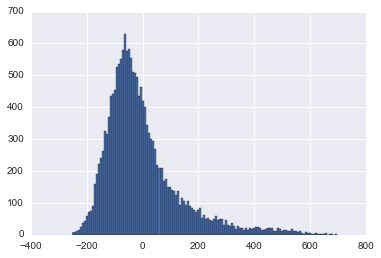

In [62]:
y = bike_data['registered']
x = bike_data[['temp', 'hum']]
model = get_linear_model_metrics(x, y, linear_model.LinearRegression())

### Mean Squared Error Slide - In Class

In [63]:
from sklearn import metrics
y=bike_data['registered']
x=bike_data[['temp', 'hum']]

lm = linear_model.LinearRegression().fit(x,y)
metrics.mean_squared_error(y, lm.predict(x))


18886.859285117065

### USING K-FOLD CROSS VALIDATION WITH MSE Slide - In Class

In [65]:
from sklearn import cross_validation
#wd = '../../datasets/'
#bikeshare = pd.read_csv(wd + 'bikeshare/bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.registered

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print np.mean(scores)


18848.0458193


### Understanding Regularization Effects Slide - In Class

In [68]:
alphas = np.logspace(-10,10,21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))
#see how it starts dropping between Alpha 1.0 and 10.0 - coefficients are changing as you're adding different biases.
#as coefficients start changing the mean square error starts changing. That means its maybe not a great fit.
#On to 'Grid Search'

Alpha: 1e-10
[ 251.64386451 -203.9817819   -52.12297552  -36.1541882   -55.4542517 ]
18835.8786344
Alpha: 1e-09
[ 251.64386451 -203.9817819   -52.12297548  -36.15418815  -55.45425165]
18835.8786344
Alpha: 1e-08
[ 251.6438645  -203.98178189  -52.12297505  -36.15418772  -55.45425122]
18835.8786344
Alpha: 1e-07
[ 251.64386446 -203.98178186  -52.12297071  -36.15418339  -55.45424689]
18835.8786344
Alpha: 1e-06
[ 251.64386406 -203.98178148  -52.12292734  -36.15414008  -55.45420361]
18835.8786344
Alpha: 1e-05
[ 251.64386001 -203.98177774  -52.12249364  -36.15370696  -55.45377077]
18835.8786344
Alpha: 0.0001
[ 251.64381952 -203.9817403   -52.11815704  -36.14937622  -55.44944277]
18835.8786344
Alpha: 0.001
[ 251.6434147  -203.98136599  -52.07483391  -36.10611168  -55.40620565]
18835.8786348
Alpha: 0.01
[ 251.63937228 -203.97762715  -51.645848    -35.67771146  -54.97808104]
18835.8786745
Alpha: 0.1
[ 251.5994776  -203.94062563  -47.74193505  -31.77963863  -51.08289174]
18835.8820353
Alpha: 1.0
[